## Fitting profiles with Markov Chain Monte Carlo
This is a jupyter notebook intended to fit stellar density profiles to 
a bunch of clusters simulated. It fits the exponential radius, ellipticity, angular position, background density and center shift in ra and dec.

The code runs reading the position of the stars in a catalog and fitting the pars. After the fitting, the results should be compared to the
truth table (the parameters of the clusters simulated).

Open a terminal and run the following commands to create and activate a new environment and install dependencies:
```
conda create -p $HOME/.conda/envs/emcee_env
conda activate emcee_env
conda install -c astropy emcee
conda install -c conda-forge matplotlib
conda install astropy
conda install -c astropy corner
conda install ipykernel
pip install astropy
ipython kernel install --user --name=emcee_env
```
Activate the environment (if you are running the code in Linea's jupyter notebook). Restart the kernel on the jupyter
notebook and load the new environment (clicking on the env on the top right selection).</br>
Ok, now you are ready to run the code. </br>
You can run this code on any machine since you follow the steps above to create an env and install dependencies.

TODO (Ana Clara, Amanda):
- insert documentation in the functions;
- plot the chains to make sure the cuts in steps are ok to all pars;
- format the results into a single file;
- add cells to compare the results to the truth table (output of fits).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import astropy.io.fits as fits
import corner
from multiprocessing import Pool

Below are a few functions (that will be documented in near future!) to provide the results of the fitting.
This is very similar to the main example available on https://emcee.readthedocs.io/en/stable/tutorials/line/ .
Please, visit that page to have a big picture of the fitting.

#                HPX      re          ell           pa_kick_     robg   shift_ra    shift dec
Pars (ideal): 35934.0 0.15359148315490373 0.09 105.53 ---- 0.00 0.00
Kick-off:  35934.0 0.15359148315490373 0.1 1.0553 0.04762859037713016 0.0 0.0


/tmp/ipykernel_8174/2065089501.py:24: RuntimeWarning: divide by zero encountered in log
  if not np.isfinite(2.*np.sum(np.log(bg+s0*np.exp(-ri/re)))):
/tmp/ipykernel_8174/2065089501.py:24: RuntimeWarning: divide by zero encountered in log
  if not np.isfinite(2.*np.sum(np.log(bg+s0*np.exp(-ri/re)))):
/tmp/ipykernel_8174/2065089501.py:24: RuntimeWarning: divide by zero encountered in log
  if not np.isfinite(2.*np.sum(np.log(bg+s0*np.exp(-ri/re)))):
/tmp/ipykernel_8174/2065089501.py:24: RuntimeWarning: divide by zero encountered in log
  if not np.isfinite(2.*np.sum(np.log(bg+s0*np.exp(-ri/re)))):
/tmp/ipykernel_8174/2065089501.py:24: RuntimeWarning: divide by zero encountered in log
  if not np.isfinite(2.*np.sum(np.log(bg+s0*np.exp(-ri/re)))):
/tmp/ipykernel_8174/2065089501.py:24: RuntimeWarning: divide by zero encountered in log
  if not np.isfinite(2.*np.sum(np.log(bg+s0*np.exp(-ri/re)))):
/tmp/ipykernel_8174/2065089501.py:24: RuntimeWarning: divide by zero encountered in log
  if n

Best-fitting: 35934.0 0.18914761689698043 0.052884452090582026 106.24477339803416 0.09645721011702335 -0.1654155790532798 0.16881847474059342


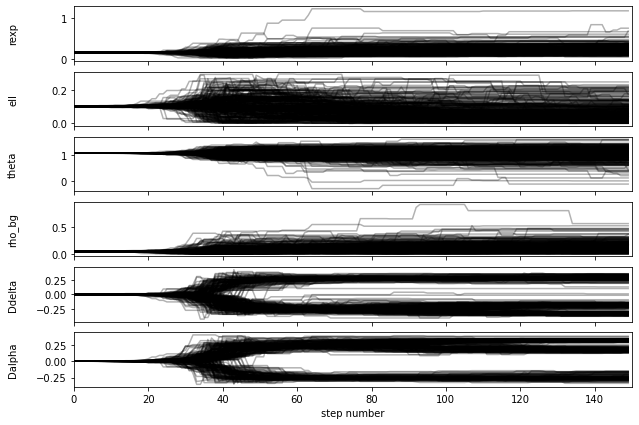

Pars (ideal): 35935.0 0.22917372628576235 0.02 78.61 ---- 0.00 0.00
Kick-off:  35935.0 0.22917372628576235 0.1 0.7861 0.09902974236829043 0.0 0.0
Best-fitting: 35935.0 0.2368189291866457 0.023863579422464996 75.62843785792882 0.17103929688532432 -0.0032526010868360374 0.30687439289113316


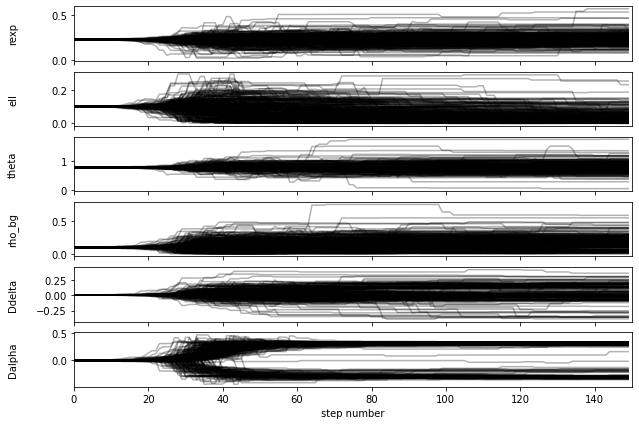

Pars (ideal): 35949.0 0.17655777236379636 0.08 124.97 ---- 0.00 0.00
Kick-off:  35949.0 0.17655777236379636 0.1 1.2497 0.06884924945604953 0.0 0.0
Best-fitting: 35949.0 0.18858759178240184 0.06076158147896211 133.03932306080148 0.11423207765529764 0.0015555644673167432 0.2846536491227135


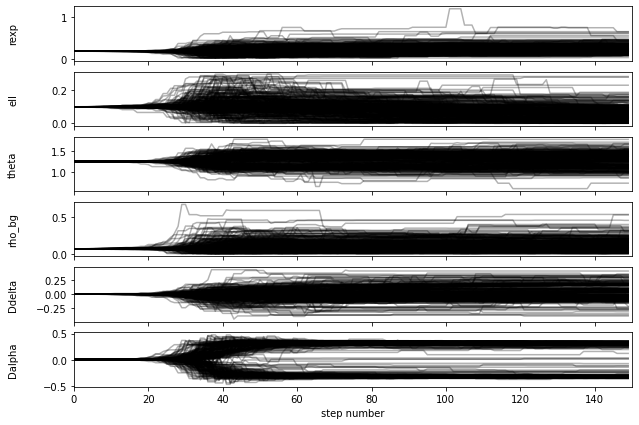

Pars (ideal): 35950.0 0.2370606546968382 0.11 60.92 ---- 0.00 0.00
Kick-off:  35950.0 0.2370606546968382 0.1 0.6092 0.0914846191402302 0.0 0.0
Best-fitting: 35950.0 0.2550186014671097 0.09001078831724568 52.39365945018508 0.08854816449209892 -0.040904687061935306 -0.3076876506134428


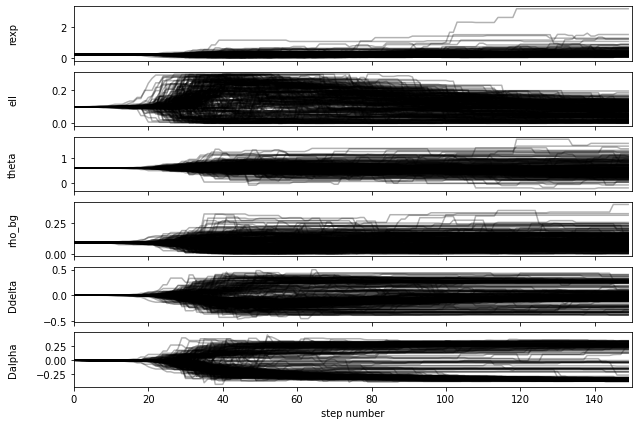

Pars (ideal): 35951.0 0.2019712880038019 0.1 60.19 ---- 0.00 0.00
Kick-off:  35951.0 0.2019712880038019 0.1 0.6019 0.08441106611392374 0.0 0.0
Best-fitting: 35951.0 0.2241270045151025 0.03377280533154555 62.43228118652496 0.17057902509108758 0.1327003145166376 -0.27479423851013324


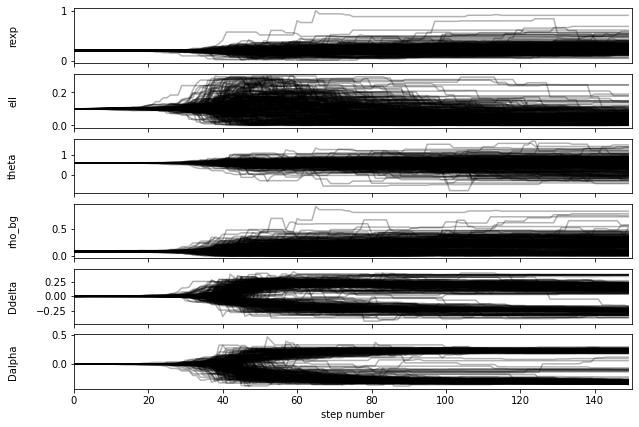

Pars (ideal): 35953.0 0.18416744125160092 0.17 99.82 ---- 0.00 0.00
Kick-off:  35953.0 0.18416744125160092 0.1 0.9982 0.07120710046481836 0.0 0.0
Best-fitting: 35953.0 0.18464502930805762 0.024652603014382553 94.39801208717077 0.09194197018184938 0.00015661810218112193 -0.3214251818296802


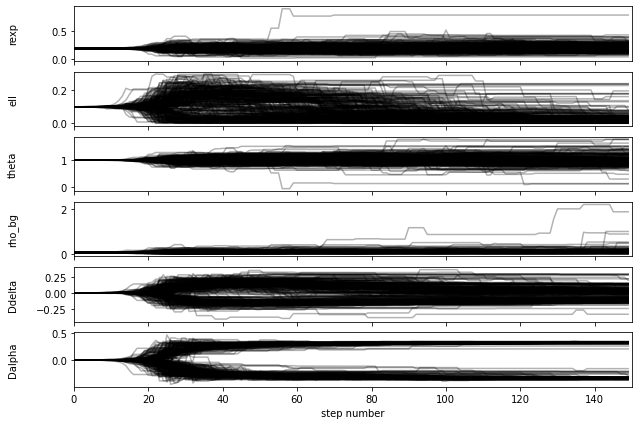

Pars (ideal): 35954.0 0.15903516727242517 0.03 91.03 ---- 0.00 0.00
Kick-off:  35954.0 0.15903516727242517 0.1 0.9103 0.06036098582448178 0.0 0.0
Best-fitting: 35954.0 0.16193199337200614 0.20279827791561786 101.9108893798625 0.09908073782310008 0.13965880685830245 -0.17705162445344427


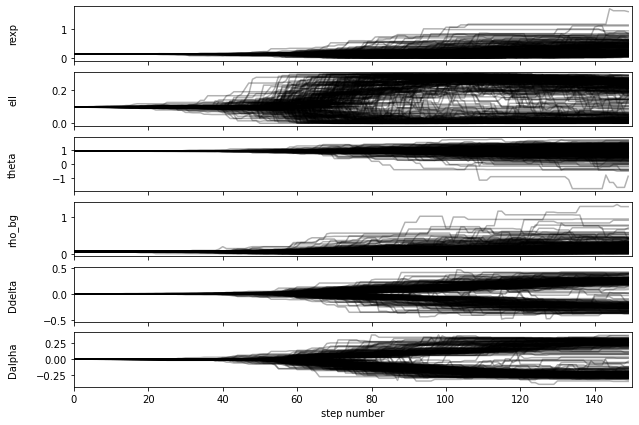

Pars (ideal): 35955.0 0.1765932919433092 0.2 129.6 ---- 0.00 0.00
Kick-off:  35955.0 0.1765932919433092 0.1 1.296 0.06649139844728072 0.0 0.0
Best-fitting: 35955.0 0.24025893578126234 0.17181746293104266 135.79350427970473 0.09570777330880088 -0.02571536786345574 0.27068071936501736


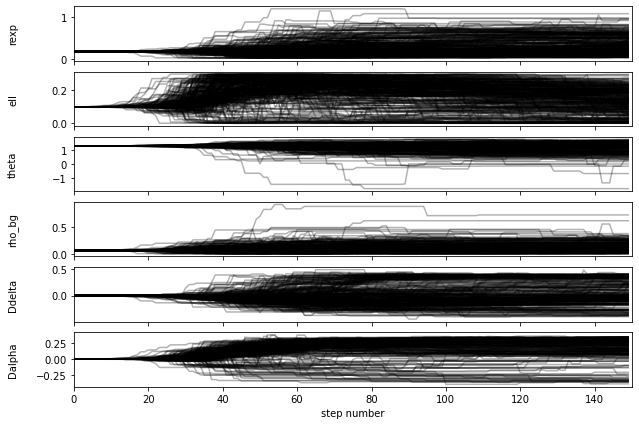

Pars (ideal): 35956.0 0.3380091130060088 0.18 0.75 ---- 0.00 0.00
Kick-off:  35956.0 0.3380091130060088 0.1 0.0075 0.10233073378056677 0.0 0.0


In [ ]:
def lnprior(theta):
    re, ell, th, bg, xc, yc = theta
    if 0.01 < re < 20. and 0.0 < ell < 0.3 and -1.8 < th < 1.8 and 0. < bg < 500. and -3. < xc < 3. and -3. < yc < 3.:
        return 0
    return -np.inf


def lnlike(theta, RA, DEC):
    re, ell, th, bg, xc, yc = theta
    dX = (RA-(ra0+xc/60.))*np.cos(np.radians(dec0))
    dY = (DEC-(dec0+yc/60.))
    ri = 60.*np.sqrt(((dX*np.cos(np.radians(100*th))-dY*np.sin(np.radians(100*th)))/(1.-ell))
                     ** 2.+(dX*np.sin(np.radians(100*th))+dY*np.cos(np.radians(100*th)))**2.)
    s0 = (len(RA)-bg*3600.)/((1-ell)*2.*np.pi*re**2)
    
    R0 = 0.5
    R1 = 0.25
    idbg = (ri < R0)&(ri > R1)
    area_annulus_arcmin = 3600. * np.pi * (R0 ** 2 - R1 ** 2)
    bg = float(len(RA[idbg]))/(area_annulus_arcmin)  # stars/arcmin^2
    N_star = (len(RA[R < R0])-(robg * 3600. * np.pi * R0 ** 2))
    s0 = (len(RA)-bg*3600.)/((1-ell)*2.*np.pi*re**2)

    if not np.isfinite(2.*np.sum(np.log(bg+s0*np.exp(-ri/re)))):
        return -np.inf
    return 2.*np.sum(np.log(bg+s0*np.exp(-ri/re)))


def lnprob(theta, RA, DEC):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, RA, DEC)

# Some definitions:
R0 = 0.5
R1 = 0.25
# ra0, dec0, reinf, resup, thmin, thmax = 67.3156, -23.8368, 0.1, 10., 0.0, 180.
HPX_, ra0_, dec0_, re_kick_, ell_kick_, pa_kick_, dist = np.loadtxt(
    'star_clusters_simulated.dat', usecols=(0, 6, 7, 8, 9, 10, 12), unpack=True)

# Converting exponential radius from parsecs to arcmin
re_kick = 60. * (180. / np.pi) * np.arctan(re_kick_ / dist)

# Reading the catalog of stars
hdu = fits.open('des_mockcat_for_detection.fits', memmap=True)
RA = hdu[1].data.field('ra')
DEC = hdu[1].data.field('dec')
MAGG = hdu[1].data.field('mag_g_with_err')
MAGGERR = hdu[1].data.field('magerr_g')
MAGR = hdu[1].data.field('mag_g_with_err')
MAGRERR = hdu[1].data.field('magerr_r')
hdu.close()

print('#                HPX      re          ell           pa_kick_     robg   shift_ra    shift dec')
for i in range(len(ra0_)):
    print('Pars (ideal):', HPX_[i], re_kick[i], ell_kick_[i], pa_kick_[i], '----', '0.00', '0.00')
    reinf = 0.5 * re_kick[i]
    resup = 1.5 * re_kick[i]
    thmin = pa_kick_[i] - 45.
    thmax = pa_kick_[i] + 45.
    ra0 = ra0_[i]
    dec0 = dec0_[i]

    R = 60.*np.sqrt(((np.cos(np.radians(dec0))*(ra0-RA))**2.)+(DEC-dec0)**2)

    re_ml = (reinf + resup)/2.
    ell_ml = 0.1
    th_ml = (thmin + thmax)/200.
    idbg = (R < R0)&(R > R1)
    area_annulus_arcmin = 3600. * np.pi*(R0**2 - R1**2)
    robg = float(len(RA[idbg]))/(area_annulus_arcmin)  # stars/arcmin^2
    N_star = (len(RA[R < R0])-(robg*3600.*np.pi * R0 ** 2))
    s_ml = N_star/(2.*np.pi*re_ml**2)
    xc_ml = 0.0
    yc_ml = 0.0
    result = re_ml, ell_ml, th_ml, robg, xc_ml, yc_ml
    print('Kick-off: ', HPX_[i], re_ml, ell_ml, th_ml, robg, xc_ml, yc_ml)

    ndim, nwalkers = 6, 300  # 300
    pos = [result + 1e-4*np.random.randn(ndim) for j in range(nwalkers)]
    with Pool() as pool:
        sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(RA, DEC), pool=pool)
        # sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(RA, DEC))
        sampler.run_mcmc(pos, 150)  # 500
    samples = sampler.chain[:, 100:, :].reshape((-1, ndim))

    samples[:, 2] = 100.*(samples[:, 2])
    re_mcmc, ell_mcmc, th_mcmc, robg_mcmc, xc_mcmc, yc_mcmc = map(lambda v: (
        v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))
    print('Best-fitting:', HPX_[i], re_mcmc[0], ell_mcmc[0], th_mcmc[0], robg_mcmc[0], xc_mcmc[0], yc_mcmc[0])
# Plotting data
    fig = corner.corner(samples, labels=["$re$", "$ell$", "$th$", r"$\rho_{bg}$", r"$\Delta\alpha$", r"$\Delta\delta$"], truths=[
                        re_mcmc[0], ell_mcmc[0], th_mcmc[0], robg_mcmc[0], xc_mcmc[0], yc_mcmc[0]], quantiles=[0.16, 0.5, 0.84], show_titles=True, plot_contours=True)
    plt.savefig(str(HPX_[i]) + '_plus.png')
    plt.close()

    L = np.zeros(len(RA))
    dX = (RA-(ra0+xc_mcmc[0]/60.))*np.cos(np.radians(dec0))
    dY = (DEC-(dec0+yc_mcmc[0]/60.))
    ri = 60.*np.sqrt(((dX*np.cos(np.radians(100*th_mcmc[0]))-dY*np.sin(np.radians(100*th_mcmc[0])))/(
        1.-ell_mcmc[0]))**2.+(dX*np.sin(np.radians(100*th_mcmc[0]))+dY*np.cos(np.radians(100*th_mcmc[0])))**2.)
    L = (np.exp(-ri/re_mcmc[0]))

    fig, axes = plt.subplots(6, figsize=(10, 7), sharex=True)
    samples = sampler.get_chain()
    labels = ["rexp", "ell", "theta", "rho_bg", "Ddelta", "Dalpha"]
    for i in range(ndim):
        ax = axes[i]
        ax.plot(samples[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)

    axes[-1].set_xlabel("step number"); plt.show()

#a = open('J0429_stars_list_profile.dat','w')
# for j in range(len(RA)):
#    if (L[j]<0.):
#        L[j]=0.
#    print >> a, RA[j], DEC[j], MAGG[j], MAGR[j], ERRG[j], ERRR[j], SM[j], L[j]
# a.close